<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 2 &ndash; Reading, Handling and Visualization of Datasets</h2>

<b>Authors:</b> Brandstetter, Schlüter, Schäfl, Schörgenhumer<br>
<b>Date:</b> 24-10-2022

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which might require small code modifications. Most/All of the used functions are imported from the file <code>u2_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u2_utils.py</code> need to be installed.

In [1]:
# Import pre-defined utilities specific to this notebook.
import u2_utils as u2

# Import additional utilities needed in this notebook.
import IPython.display as ipd
import numpy as np
import seaborn as sns
import spacy

from matplotlib.image import imread

# Set default plotting style.
sns.set()

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u2.setup_jupyter()

<h3 style="color:rgb(0,120,170)">Module versions</h3>

As mentioned in the introductory slides, specific minimum versions of Python itself as well as of used modules are recommended.

In [2]:
u2.check_module_versions()

Installed Python version: 3.10 (✓)
Installed numpy version: 1.23.3 (✓)
Installed pandas version: 1.5.0 (✓)
Installed scikit-learn version: 1.1.2 (✓)
Installed matplotlib version: 3.6.1 (✓)
Installed seaborn version: 0.12.0 (✓)
Installed scipy version: 1.9.2 (✓)
Installed spacy version: 3.4.2 (✓)


# Images

Images are usually represented in 3 dimensions, i.e. $height$ x $length$ x $channels$. **Channels** are different layers which produce the final image when combining them, often these are **red, green and blue channels**.

For all the following tasks we play arround with an image from Charlie. 
By executing the code below we can inspect the dimensions of an image and see that it has a height of 267 pixel, a length of 200 pixel, and 3 channels. If you work with images, checking the dimensions of an image is always a good starting point.

In [3]:
# path to image
image_path = "resources/charlie_tiny.jpg"

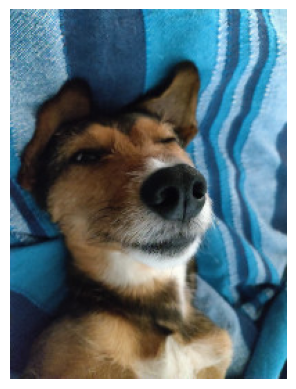

(267, 200, 3)


In [4]:
# plot image
u2.plot_image(image_path)

# load image and print its dimensions
img = imread(image_path)
print(img.shape)

Which and how many channels an image consists of is defined by the **color model**. In the field of AI additive and subtractive color models are most relevant.

Another important term, the **color depth** of an image (also bit depth) refers to the number of colors that can be represented by each pixel. Very common color depths for images used in the field of AI are **8-bit** and **16-bit**. For 8-bit images every channel can contain values ranging from 0 to 255 ($2^8 = 256$ colors). Analogously, the values of 16-bit images can range from 0 to 65,535 ($2^{16} = 65,536$ colors). Be aware that a higher number of colors goes along with a higher memory consumption (which can be a bottleneck when learning from images).

With the following code snippet you can inspect the minimum and maximum value of our Charlie image per channel:

In [5]:
# select channel 0, 1 or 2 (computer scientists start counting at 0)
channel = 2

img = imread(image_path)
print(f"Minimum: {np.min(img[:,:,channel]):>3}")
print(f"Maximum: {np.max(img[:,:,channel]):>3}")

Minimum:   2
Maximum: 255


<h3 style="color:rgb(0,120,170)">RGB</h3>

The **RGB** color model is additive and the most important model for colored images. It uses 3 channels, namely a red (R), green (G) and blue (B) channel. It's called additive as adding up the 3 color channels results in an image like below. 

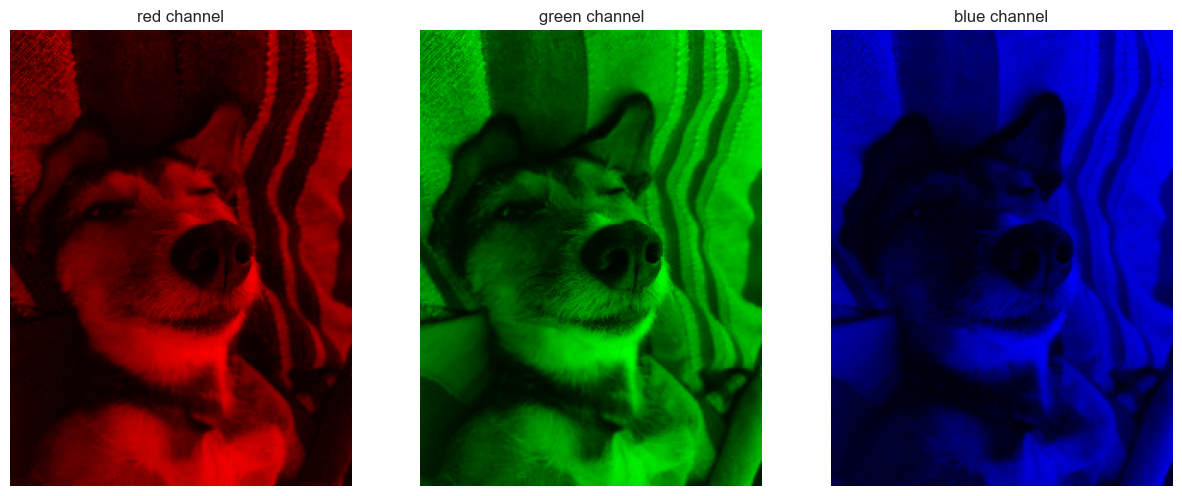

In [6]:
# plot the 3 color channels of the RGB image above
u2.plot_image_channels_rgb(image_path)

<h3 style="color:rgb(0,120,170)">RGBA</h3>

A variant of RGB, **RGBA**, uses a fourth channel which stands for "Alpha" and controls the transparency of an image.

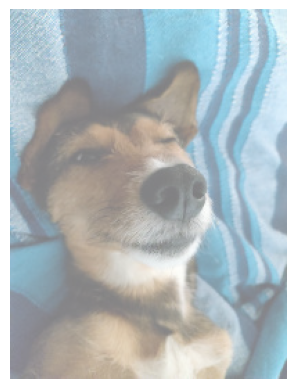

In [7]:
# set the transparency to 50% 
u2.plot_image_rgba(image_path, alpha=0.5)

<h3 style="color:rgb(0,120,170)">Grayscale</h3>

Sometimes, images have only one channel representing the brightness. These are called grayscale images. Color images can be converted to grayscale but the inverse, i.e., converting a grayscale to a color image, is not possible without additional information.

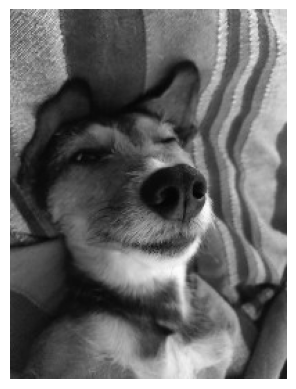

In [8]:
u2.plot_image_grayscale(image_path)

<h2 style="color:rgb(0,120,170)">Augmentation</h2>

In computer vision, a field of computer science focused on processing and understanding images (and other forms of visual input, e.g. videos), there has been a strong shift towards machine learning as a way to understand, manipulate and even generate images. This shift can be explained in part with the extremely high complexity and dimensionality of information contained in images, making it very hard to build functions that work with images by hand. 

Let us, for example, think about a function that takes as an input an arbitrary image and has to output if this is an image of Charlie or not. Just comparing the image with photos of Charlie could work, but only if you have a very large database of images showing Charlie in every situation (e.g. different environments, lighting conditions, poses, angles and so on). Still, this approach would probably not give you 100% accurate results. Another approach could be to design a function that "**models**" Charlie, i.e. that looks for eyes, nose, mouth, ears, fur and so on (each of which is still a hard problem) and then decides based on rules if an image shows Charlie or not. As you can imagine this is very hard, as again you have to account for innumerable different scenarios and conditions. 

A machine learning approach can be viewed as a combination of those two approaches. We "show" a machine learning model a large number of images with and without Charlie and train it to distinguish between these two groups. The model should extract **features** and rules how to combine them itself, so we don't have to come up with them. With enough images this turns out to work very well.

However, getting a lot of images with Charlie is still a lot of work, so to reduce our workload we can **augment** the set of images we have already by artificially changing them such that the original content is preserved (i.e. a scene with Charlie or not) but in a slightly different way. 

<h3 style="color:rgb(0,120,170)">Rotation</h3>

A common augmentation method is to rotate images around their center by a certain angle. As with every other augmentation method it always depends on the task you want to solve how much rotation makes sense or if you want to use this method at all (e.g. lots of images with Charlie rotated by 90 degrees might not make too much sense).

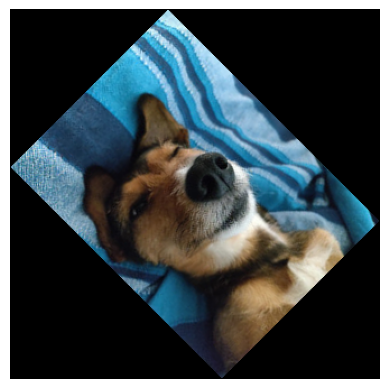

In [9]:
# rotate image by a given angle
u2.plot_rotated_image(image_path, angle=45)

<h3 style="color:rgb(0,120,170)">Flipping</h3>

Another very common augmentation technique is flipping, i.e. mirroring the image across its horizontal or vertical axis.

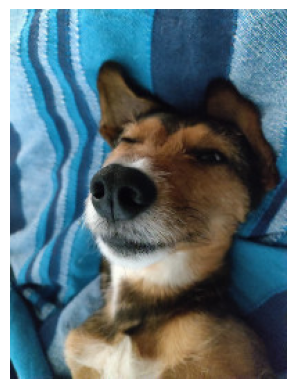

In [10]:
# flip image horizontally
u2.plot_flipped_image(image_path, flipping="horizontal")

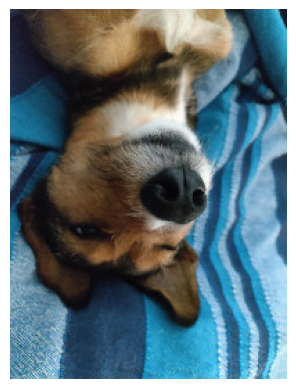

In [11]:
# flip image vertically
u2.plot_flipped_image(image_path, flipping="vertical")

<h3 style="color:rgb(0,120,170)">Zooming/Cropping</h3>

To see Charlie in different sizes an easy solution is to zoom into the image. As most machine learning methods require that all images have the same resolution this means selecting a smaller part of the image and then resizing it to the original resolution. 

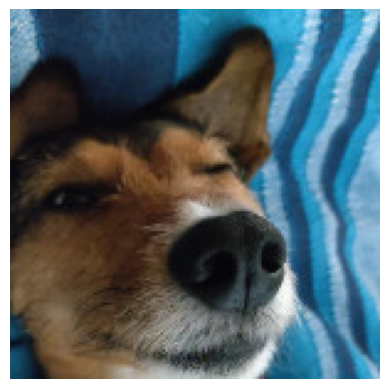

In [12]:
# extract a 150x150 pixel crop starting at 30 pixels from the top and left
u2.plot_cropped_image(image_path, left=30, top=30, width=150, height=150)

<h3 style="color:rgb(0,120,170)">Blurring</h3>

Usually not all images are super sharp, so it helps to show our machine learning model blurry images such that it learns to detect blurred Charlies as well. There are different ways to blur an image, the most common being a gaussian blur. For this method a filter modelled by a Normal distribution (also called Gaussian) is slid over the image and a weighted sum of the filter and the pixels that are covered by the filter is calculated. Don't worry if this sounds complicated, it will become clear later in your studies.

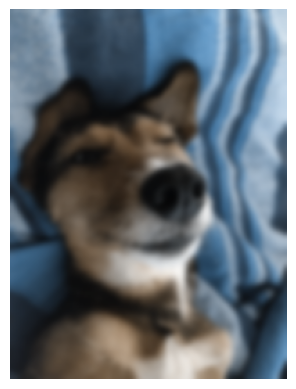

In [13]:
# blur image
u2.plot_blurred_image(image_path, sigma=2.0)

<h2 style="color:rgb(0,120,170)">Segmentation</h2>

A common problem in computer vision is to mark an object, like a dog, in an image. This is called **segmentation** as we segment the image into "object" and "not object". As you can imagine, this is not easy and there are several methods to tackle this problem. In the course of your studies you will learn to segment images using machine learning methods but for now let's try a very simple method to illustrate the difficulty of this problem.

First, let's look at the **histogram** of Charlie's image. A histogram shows the occurance of individual color values of an image.

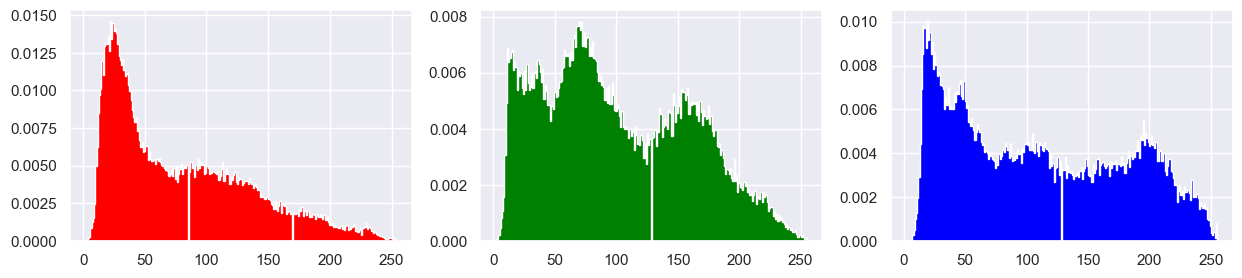

In [14]:
# plot histograms for each color channel
# histograms have been normalized (the area under the histogram sum to 1)
# values for each channel range from 0 to 255 (see tick values on x-axis)
u2.plot_color_histograms(image_path)

Now, look at the histograms and try to find **threshold** values for each color to segment the image into Charlie and background. You can use the parameters `upper_threshold_X` and `lower_threshold_X` (replace `X` with `r` (red), `g` (green) or `b` (blue) for the corresponding colors) to only inlucde values $\leq$ or $\geq$, respectively. Don't worry if you can't get a perfect segmentation, but see if you can find better values.

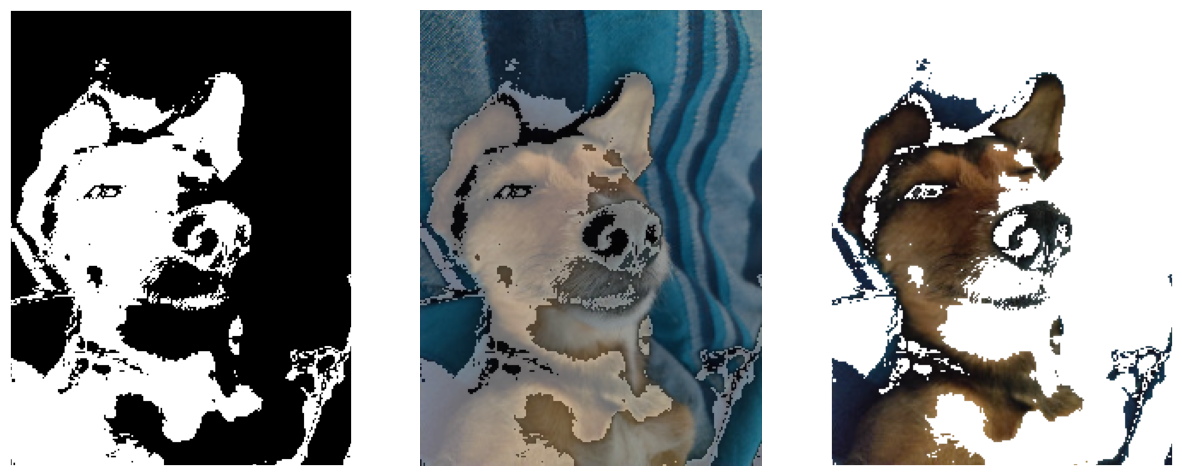

In [15]:
# segment image with the thresholds for red channel, green channel and blue channel
u2.segment_image(image_path, lower_threshold_r=15, upper_threshold_b=75)

# Sound

<h3 style="color:rgb(0,120,170)">Creating sound waves</h3>

What we perceive as sound is our ear detecting waves of pressure (i.e. sound waves) in the ambient air. If we record sound with a microphone, the sound waves are converted into an electrical signal. To retrieve this continuous-time signal in digital form, we need to reduce it to a discret-time signal via **sampling**. The continuous signal is frequently measured in constant intervals $t_s$ (we measure the interval in seconds, thus the subscript $s$). Then our sampling rate is calculated as $sr = \frac{1}{t_s}$. The unit for the sampling rate is Hertz (Hz) i.e. if we have a sampling rate of 48 kHz (48 kilo Hz) we retrieve 48,000 samples per second. Below we plot a simple sound wave in blue and depict the sampling points in orange.

Number of wave points: 250


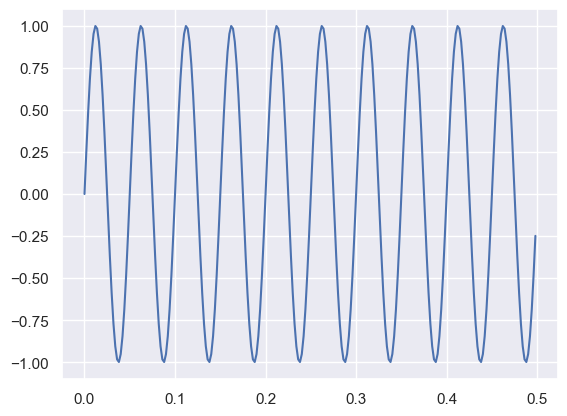

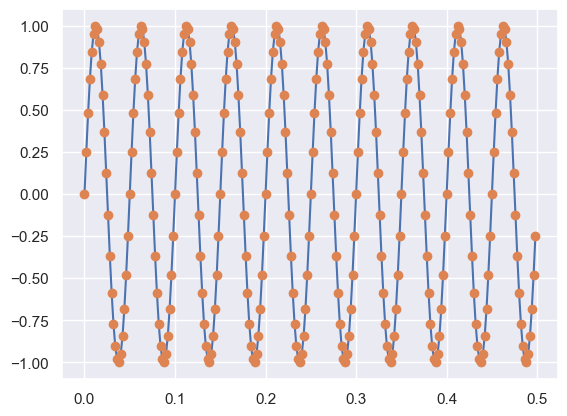

In [16]:
f  = 20   # frequency of the wave
T  = 0.5  # length of sound signal
sampling_rate = 500  # sampling rate

# create sine wave
points_of_wave = u2.generate_wave(f, T, sampling_rate)
print(f"Number of wave points: {len(points_of_wave)}")
u2.plot_wave(points_of_wave, T, sampling_rate)
u2.plot_wave_with_sampling_points(points_of_wave, T, sampling_rate)

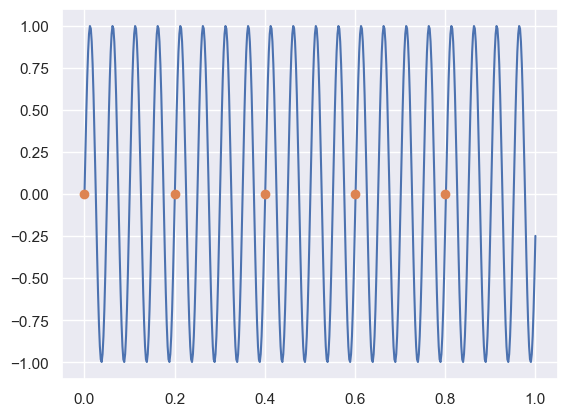

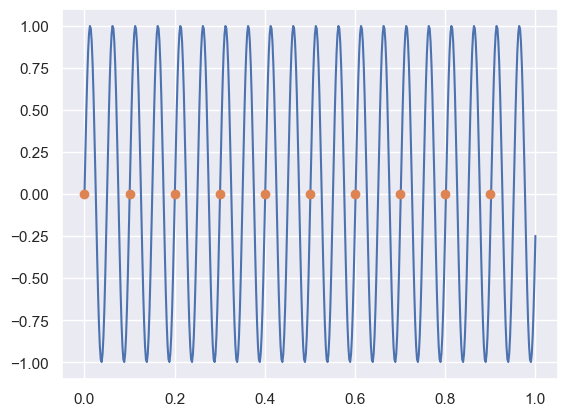

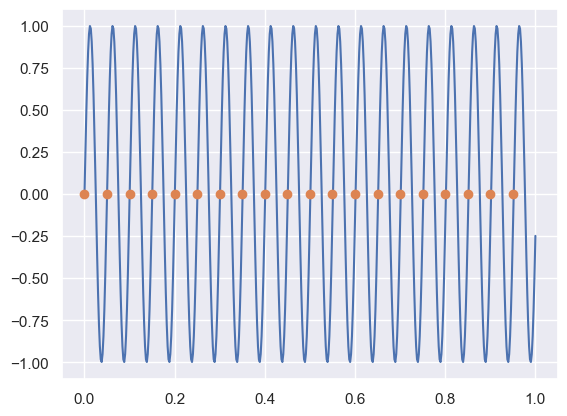

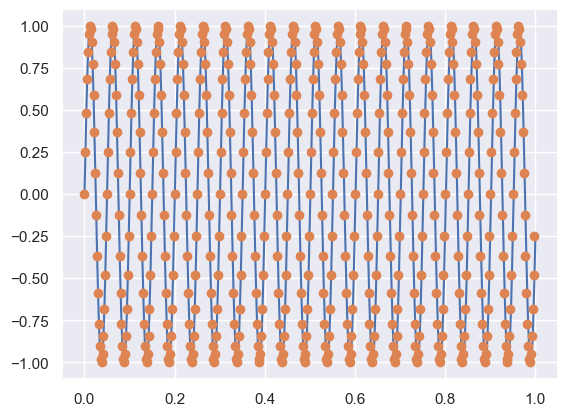

In [17]:
T = 1   # length of sound signal
f = 20  # frequency of the wave

# generate the wave points
points_of_wave = u2.generate_wave(f, T, 500)

# plot 
u2.plot_wave_with_sampling_rate(points_of_wave, f, T, sampling_rate=5)
u2.plot_wave_with_sampling_rate(points_of_wave, f, T, sampling_rate=10)
u2.plot_wave_with_sampling_rate(points_of_wave, f, T, sampling_rate=20)
u2.plot_wave_with_sampling_rate(points_of_wave, f, T, sampling_rate=500)

Since the waves above represent sound, we can also listen to them. Below we create a sinoid wave with $f = 440~\text{Hz}$. This is commonly defined as the tone with pitch "A" (even if there are alternative definitions).

In [18]:
T = 1    # length of the sound signal
f = 440  # frequency of the wave
sampling_rate = 24000  # sampling rate

# generate wave
points_of_wave  = u2.generate_wave(f, T, sampling_rate)

# create a player to listen to wave
ipd.Audio(points_of_wave, rate=sampling_rate)           

<h3 style="color:rgb(0,120,170)">Fourier Transform</h3>

Every sound that you hear is a composition of waves with various frequencies and amplitudes. If we are given a signal, we can retrieve the frequencies by applying the **Fourier Transform**. Let's do it for the signal above

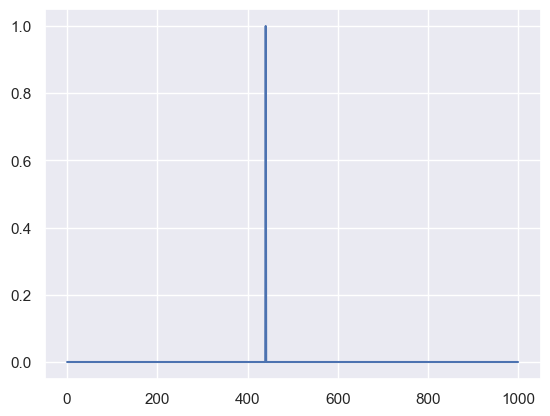

In [19]:
ft = u2.apply_fourier_transform(points_of_wave)
u2.plot_spectrum(ft, sampling_rate, max_freq=1000)

<h3 style="color:rgb(0,120,170)">Multiple waves</h3>

Let's generate multiple waves and add them together. 

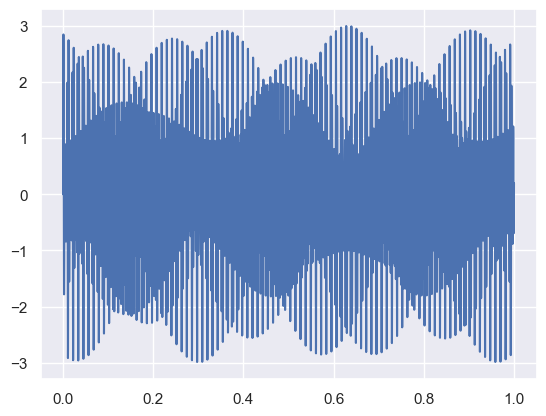

In [20]:
T = 1  # length of the sound signal
sampling_rate = 24000 # sampling rate

# generate three waves
points_of_wave_1 = u2.generate_wave(440, T, sampling_rate)  # in music terms, this is A4
points_of_wave_2 = u2.generate_wave(349.228, T, sampling_rate)  # this is E4
points_of_wave_3 = u2.generate_wave(261.626, T, sampling_rate)  # this is C4

# add the waves thogether
added_points_of_wave = points_of_wave_1 + points_of_wave_2 + points_of_wave_3

# plot the wave and create player to listen to tone
u2.plot_wave(added_points_of_wave, T, sampling_rate)
ipd.Audio(added_points_of_wave, rate=sampling_rate)

Again, let's perform a Fourier-Transform on the data:

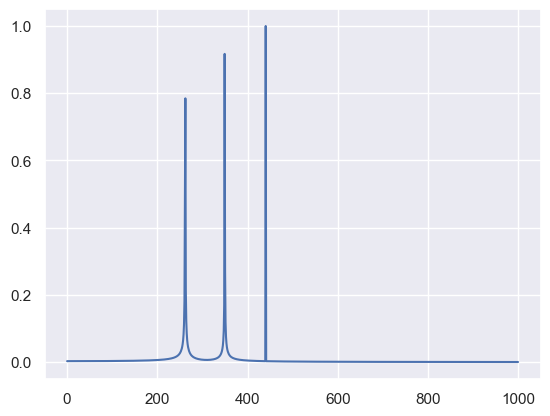

In [21]:
ft_added_points = u2.apply_fourier_transform(added_points_of_wave)
u2.plot_spectrum(ft_added_points, sampling_rate, max_freq=1000)

<h3 style="color:rgb(0,120,170)">Complex sounds</h3>

Now let's consider a more complex piece of sound. 

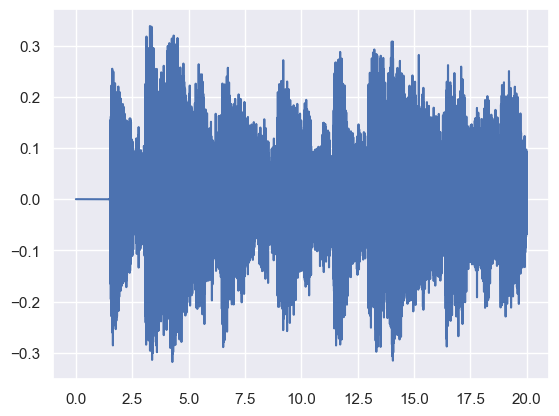

In [22]:
sound_path = "resources/piano.wav"
T = 20
points_piano, sampling_rate_piano = u2.read_wav_file(sound_path, time=T)
u2.plot_wave(points_piano, T, sampling_rate_piano)
ipd.Audio(points_piano, rate=sampling_rate_piano)

Once again, let's perform a Fourier Transform:

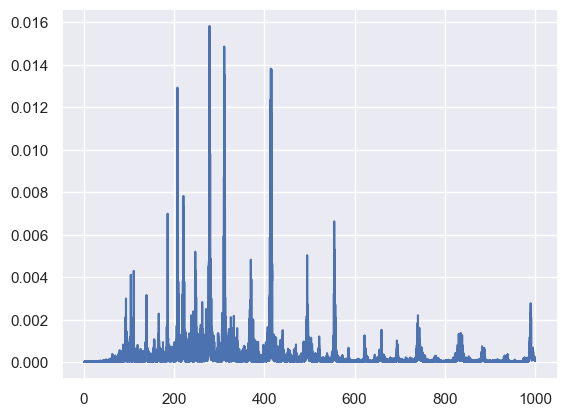

In [23]:
ft_points_piano = u2.apply_fourier_transform(points_piano)
u2.plot_spectrum(ft_points_piano, sampling_rate_piano, max_freq=1000)

We see a way more complex frequency spectrum. The plot is cut at $1000~\text{Hz}$, but humans are capable to hear sounds in the range of approximately $20~\text{Hz}$ to $20~\text{kHz}$. Feel free to increase `max_freq` to see more.

<h3 style="color:rgb(0,120,170)">Spectrograms</h3>

The spectrum above shows which frequencies appear in the piano recording, but does not show at what time they appear. If we want to analyze the melody being played, for example, we also need to know the temporal order and length of the notes. This can be done by computing a spectrum for the first few milliseconds, another one for the next few milliseconds, and so on. If we stitch these spectra together, we obtain a matrix called a *spectrogram*:

In [24]:
spectrogram_piano = u2.compute_spectrogram(points_piano, winsize=2048, hopsize=512)
spectrogram_piano.shape

(1719, 1025)

The first dimension denotes time frames, the second one frequency bins. We can plot one of the spectra:

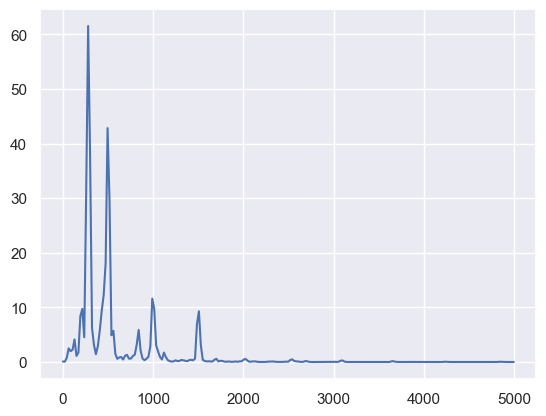

In [25]:
u2.plot_spectrum(spectrogram_piano[300], sampling_rate_piano, max_freq=5000)

Or we can visualize the whole sequence of spectra as a grayscale image:

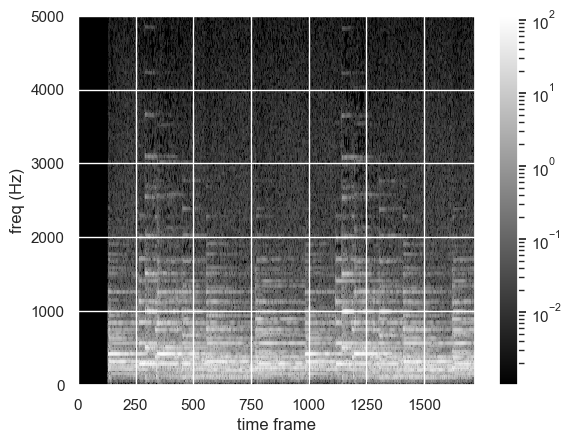

In [26]:
u2.plot_spectrogram(spectrogram_piano, sampling_rate_piano, max_freq=5000)

The matrix is rotated (*transposed*) for plotting, such that time progresses horizontally. We see a bit of silence in the beginning, then the piano notes, each comprised of several harmonic overtones (parallel horizontal stripes).

# Text

Learning to understand text poses several problems, starting with how to even **represent** text to a learning method.
Images, for example, are represented as pixel values organized in a fixed grid, but representing all words and/or phrases of a language is not feasible.

Therefore, often when working with text models (also called **Natural Language Processing** or **NLP** for short) the text corpus is pre-processed to make it easier to learn from it.
In a first step, the vocabulary is reduced by e.g. selecting only the 10,000 most common words. 

This reduced **vocabulary** can then be represented as a **one-hot encoding**. This means, that for each word we have a vector with 10,000 numbers where all are zero but the element representing a specific word is set to 1.

To show you how this could look like, imaging our vocabulary $\mathbf{v}$ contains now only a subset of 6 words: $\mathbf{v} = \{Charlie, an, is, awesome, dog, cat\}$.
The sentence "Charlie is an awesome lion" would be now represented as follows.

In [27]:
# convert the sentence "Charlie is an awesome lion" to a one-hot encoding
vocabulary = ['Charlie', 'an', 'is', 'awesome', 'dog','cat']
sentence = 'Charlie is an awesome lion'

u2.convert_to_onehot(vocabulary, sentence)

'lion' is not in list


0  1  2  3  4  5
Charlie  1  0  0  0  0  0
is       0  0  1  0  0  0
an       0  1  0  0  0  0
awesome  0  0  0  1  0  0
lion     0  0  0  0  0  0

<h3 style="color:rgb(0,120,170)">Word embeddings</h3>

However, for a larger vocabulary with e.g. 10,000 words the usage of a one-hot encoding is still not ideal to be processed by a learning method. Therefore, a common step is to **embed** this representation.
Basically, this means instead of having a vector of length 10,000 with zeros and a one we try to represent each word by a much smaller vector (e.g. of length 256) but with real numbers instead of binary values. 

Finding the correct numbers to best represent each word, and therefore a good embedding, is a challenging task which has been researched a lot in recent times. An additional, and very important, property we want from a good embedding is that it places similar items (in our case words) near each other in the **vector space** of the embedding and dissimilar words far apart. Later you will see an example what this means and why it is a very nice property for natural language processing.

One of the most prominent methods for embedding text is called **word2vec** that creates such an embedding from a large text dataset. This embedding, among others trained on different, even larger text datasets, can be downloaded and used for your own projects. We make use of this and use a library called "spacy" to load such an embedding in the following example.

In [28]:
# download embedding 
!python -m spacy download en_core_web_md

     --------------------------------------- 42.8/42.8 MB 34.5 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


<b>NOTE: if <code>spacy</code> is freshly installed by the previous operation/cell, the kernel of this notebooks needs to be restarted!</b>

In [29]:
# load dataset containing embeddings for around 20,000 words
# every embedding vector has a length of 300 in this dataset
word_embedding_english = spacy.load('en_core_web_md')

We now retrieve the vectors for other words and check how similar their embeddings are.

In [30]:
cat = word_embedding_english('cat')
dog = word_embedding_english('dog')
banana = word_embedding_english('banana')
apple = word_embedding_english('apple')
orange = word_embedding_english('orange')

In [31]:
orange.vector.shape

(300,)

In [32]:
orange.vector

array([-3.0138e+00, -3.0856e-01, -3.0320e+00,  4.5559e+00, -1.0977e+00,
       -5.6253e+00, -1.7730e+00,  3.3926e+00, -2.1127e+00,  2.6159e+00,
        4.8538e+00, -2.2300e+00, -3.5967e+00,  5.2277e-01,  3.7832e-01,
       -2.9132e-01, -2.0654e+00, -6.6414e-01,  2.3675e+00, -2.4700e+00,
       -7.5943e-01,  1.8777e+00, -2.1573e+00, -3.7055e+00,  9.6657e-01,
       -3.3682e+00, -3.3165e+00, -2.9072e+00,  5.2709e-01,  1.4246e+00,
       -2.1630e+00, -2.0499e-01, -1.0880e+00, -2.7954e+00,  2.1003e+00,
       -1.2770e+00,  2.7983e+00,  2.4945e+00,  1.9565e+00, -2.1918e+00,
        2.5573e+00, -1.3056e+00, -9.2950e-01,  2.6800e+00,  4.3877e-01,
        6.0801e+00,  6.7100e-01, -8.6571e-01, -2.1254e+00,  1.0101e+00,
        9.9656e-01,  1.4760e+00, -9.8677e-01,  3.1614e-01, -1.4447e+00,
        1.1571e+00,  9.8503e-01,  1.2924e+00,  2.9399e+00,  1.4712e+00,
       -4.5609e-01,  6.8722e-01, -7.1519e-01, -1.7112e+00, -1.5096e+00,
       -1.8212e+00,  7.3125e-01, -4.8476e+00,  2.6289e+00,  1.33

In [33]:
# similarity of dog and cat
orange.similarity(apple)

0.6135186910219964

In [34]:
# similarity of dog and apple
dog.similarity(apple)

0.22881004310646885

In [35]:
# similarity of banana and apple
banana.similarity(apple)

0.6646700829971469

If we compare words and their embeddings with the iris dataset from the beginning we can encounter similarities in their structure. Our **samples** are not individial flowers but words and our **features** are not 4 measurements but 300 real numbers representing a word. Analogously, we can **down-project** the 300-dimensional representation of a word to 2 (or 3) dimensions to draw it as a dot in a 2D (or 3D) plot. To do so, we apply the **PCA** down-projection method like for tabular data.

In [36]:
example_words = ['dog', 'cat', 'tiger', 'lion', 'car', 'bike', 'apple', 'banana', 'jeans', 'dress', 'awesome', 'lucky', 'man', 'woman', 'king', 'queen']

# get embedding vectors for list of words
df_embeddings = u2.get_word_vectors(word_embedding_english, example_words)
df_embeddings

0        1         2         3         4         5        6    \
dog      1.233000  4.29630 -7.973800 -10.12100  1.820700  1.409800 -4.51800   
cat      3.703200  4.19820 -5.000200 -11.32200  0.031702 -1.025500 -3.08700   
tiger    0.032863  1.80070 -1.385400  -3.52690 -0.242360  0.410860  0.26883   
lion     1.274600  0.46242 -1.182900  -5.26610 -2.712800  1.852100 -0.94273   
car      4.585500  2.45560 -8.523300  -6.05950 -0.448790 -2.540900  4.37210   
bike     2.915600  5.29380 -5.005500  -5.60700  1.275300  0.390280 -1.91310   
apple   -1.008400 -2.03080 -0.641850   2.69280  0.317710 -2.666200 -3.73720   
banana   0.207780 -2.41510  0.366050   2.01390 -0.237520 -3.195200 -0.29520   
jeans   -2.534300  3.48450 -2.657100  -0.58213  0.895050  2.566300 -2.39800   
dress   -2.683600  0.61505 -3.562400  -3.02710 -0.528820 -0.979280 -1.93390   
awesome  0.211100 -1.63730 -2.776000  -3.22610  0.566480 -0.016202  1.18060   
lucky    0.141800  1.75910  0.098044  -2.74930 -0.530030  2.784300  2.09800   
man     -1.286700 -0.79920 -2.092000  -0.77679 -2.505700  2.712300  0.59127   
woman    0.765480  1.07580 -1.633000  -2.99800 -0.826360  0.209500 -1.41990   
king    -0.112960 -4.18650 -1.845300   0.30781  2.495600  0.962670 -1.81610   
queen    2.167000  0.29991 -3.127700  -2.78170 -0.267430  3.080400 -2.65280   

             7        8        9    ...     290      291       292      293  \
dog     -5.22610 -0.29157  0.95234  ...  2.5688 -5.25470  6.984500  0.27835   
cat     -3.73270  0.53875  3.56790  ...  4.7743 -3.09230  8.470900  0.30132   
tiger    0.26619  2.20890  0.55610  ...  1.2729  0.11751  5.608700  0.35144   
lion     2.18650  6.50300  0.67040  ... -1.2865  2.88550  6.121900  1.78240   
car      1.48890  4.60750  6.79330  ... -7.0462 -8.33900  0.648060  0.73438   
bike     1.26800  1.16940 -0.17721  ... -5.9799  0.48621  1.061800  2.87770   
apple    5.47140 -5.17510  0.51958  ...  1.8836 -0.97302  2.061000 -3.40560   
banana   1.22720 -3.41290 -0.54969  ...  1.9156 -1.56510  1.831500 -1.42570   
jeans    1.70310 -1.37660 -3.22530  ...  3.8625  4.94970  1.038500 -0.40905   
dress    1.46880 -2.39480  2.68060  ...  1.3374  8.92280  1.330300  0.86212   
awesome  0.96579 -2.59550  0.56933  ... -1.0591  0.84896  2.330000 -0.51724   
lucky    2.40480  3.92560  1.85960  ...  3.7313 -1.64400  2.160900  1.35100   
man      3.29270 -1.58260  6.45150  ...  3.9408 -1.97200  0.072622 -2.59040   
woman    3.85640 -1.20700  7.56570  ...  3.8602  2.61160 -1.239400 -1.60160   
king     4.46550 -2.82100  0.97090  ...  2.0645 -1.62210 -2.817100 -2.96800   
queen    0.59692  0.12359  4.85860  ...  3.2187  1.67530  0.025952 -1.22070   

             294       295      296       297       298      299  
dog     -6.45540  -2.13270 -5.65150  11.17400 -8.056800  5.79850  
cat     -5.61730  -0.54610 -4.84590   6.03030 -6.966400  3.14450  
tiger   -1.45370   1.33460 -1.04030   0.84087 -7.469900 -0.37174  
lion     1.42640  10.62800 -0.36028   1.92680 -7.835000  0.57865  
car     -4.76530  -3.44080 -3.54430   2.77350  1.246400 -0.44430  
bike     1.94020  -0.25333 -0.85761   1.06690  1.533800 -2.51760  
apple   -2.80990  -0.63786  4.28870   0.59301  0.991320 -0.82037  
banana  -1.68610  -0.51953  1.76350  -0.50722  1.388000 -1.10120  
jeans   -3.08940   3.25920  1.48600  -1.67860  0.041206 -2.91520  
dress   -1.55900   1.12720  3.17340  -0.72993 -3.164100  1.87150  
awesome -0.13066  -0.76975 -2.53810   1.91830 -3.559500 -0.32987  
lucky   -3.00700  -0.37245 -6.37320   4.55050 -1.326500  0.15996  
man     -1.43900  -3.33120  4.83770   8.82060  0.188370  2.70380  
woman   -1.24060  -2.85610  3.81570   4.32720 -2.048300  2.30860  
king     1.36510   3.61370 -0.32096  -1.93460 -4.873800  2.55650  
queen    0.97648   2.26510  0.30664   2.13400 -7.068400  1.01800  

[16 rows x 300 columns]

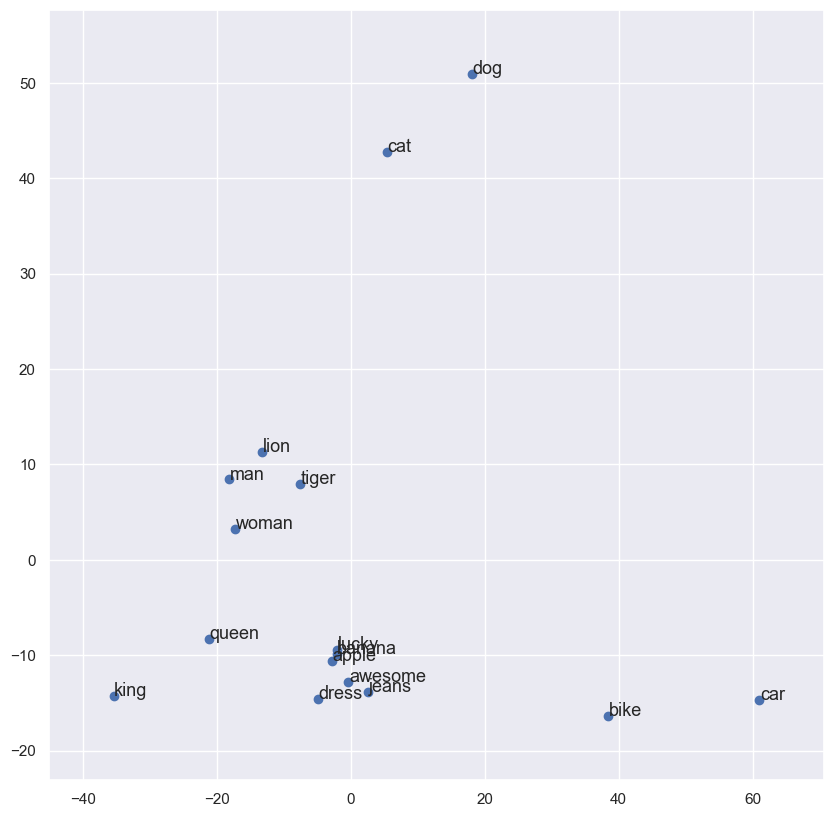

In [37]:
embeddings_pca_2d = u2.apply_pca(n_components=2, data=df_embeddings)
u2.plot_word_embeddings_2d(embeddings_pca_2d)

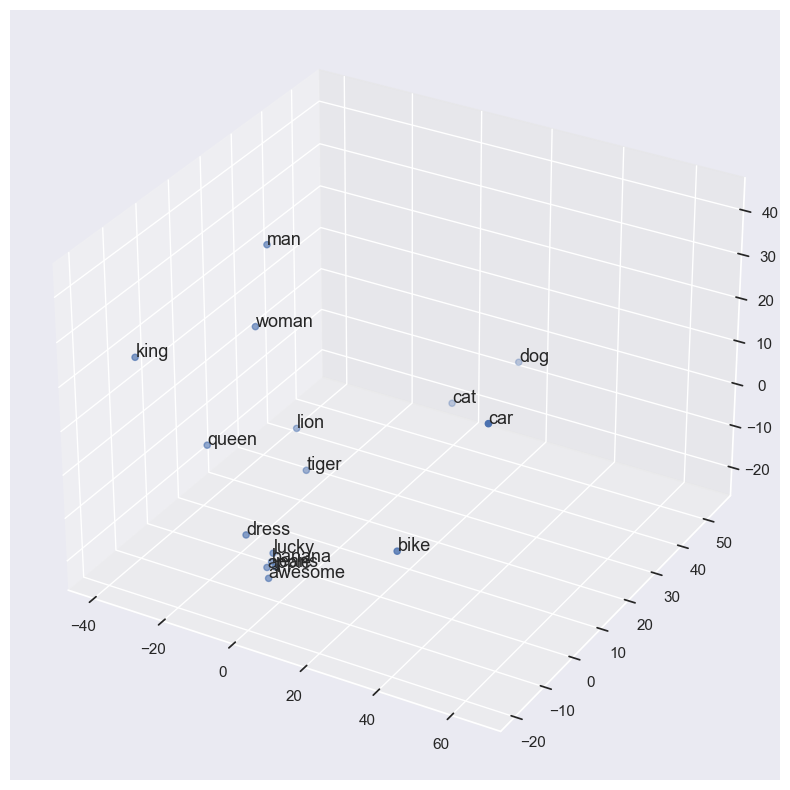

In [38]:
embeddings_pca_3d = u2.apply_pca(n_components=3, data=df_embeddings)
u2.plot_word_embeddings_3d(embeddings_pca_3d)

We can also calculate the similarity of one word to all others and in this way find similar and dissimilar words.

In [39]:
# select the word "dog" from the list above and get the embedding vector
query = word_embedding_english("dog").vector

# find similar and distant words for our query
similar, distant = u2.find_similar_words(query, df_embeddings)

# print result
print("Similar:\t{}".format(", ".join(similar)))
print("Distant:\t{}".format(", ".join(distant)))

Similar:	dog, cat, tiger
Distant:	king, lucky, awesome


Another nice thing we can do with embeddings is perform calculations. Although the results are not always meaningful, it's fun when it works.

In [40]:
# get embedding vectors of some words
king = word_embedding_english("king").vector
man = word_embedding_english("man").vector
woman = word_embedding_english("woman").vector

# calculate the result for the expression "king - man + woman"
# find similar words to the result
similar, _ = u2.find_similar_words(king - man + woman, df_embeddings)

# result
print("Similar:\t{}".format(", ".join(similar)))

Similar:	king, queen, woman
